STEPS:

1. Data Cleaning:
Removed unnecessary columns (Unnamed: 2, Unnamed: 3, Unnamed: 4).
Checked for missing values and duplicates.
Checked for the shape of the dataset.

2. Exploratory Data Analysis (EDA):
Checked the counts of spam and not spam (ham) labels.
Plotted a pie chart to visualize the class distribution (imbalanced data).
Calculated and visualized the number of characters, words, and sentences in each email.
Explored the distribution of these features for spam and not spam emails.

3. Data Preprocessing:
Created new features: num_characters, num_words, and num_sentences.
Converted email texts into vectors using the CountVectorizer.
Split the data into train and test sets

4. Model Building:
Used the Gaussian Naive Bayes classifier (GaussianNB) for building the model.
Fitted the model on the training data.
Evaluated the model's accuracy on the test data.

5. Evaluation:
Checked the accuracy of the model on the test set.

6. Deployment:
Created a function (predict_spam) to make predictions on new email texts.
Used Gradio to create a simple web interface for the spam classifier.
Launched the Gradio interface for user interaction.

7. Improvement (Future Steps):
Potential steps for improvement could include trying different models, tuning hyperparameters, or using more advanced techniques for text processing and feature extraction.
AWS EC2 deploy

In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

In [2]:
# Read the data
df = pd.read_csv("spam.csv")
# df_= pd.read_csv("mail_data.csv") #they are both same dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True)
df.sample(2)

,v1,v2
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
3914,ham,Ard 530 lor. I ok then message �_ lor.


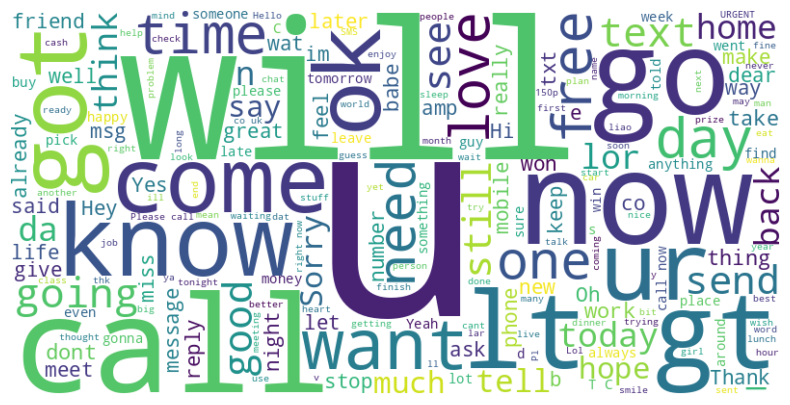

In [5]:
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(''.join(df.v2))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [7]:
df["v1"] = encoder.fit_transform(df["v1"])
df.sample(2)

,v1,v2
2087,0,\alright babe
2840,0,Ok thanx...


In [8]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [9]:
df.duplicated().sum()

409

In [10]:
df = df.drop_duplicates(keep="first")
# df.tail(3)
df.shape

(5163, 2)

EDA

In [11]:
df["v1"].value_counts()

v1
0    4516
1     647
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x79e6b9c7e9b0>,
 [Text(-1.0158507947047788, 0.42195635188686254, 'ham'),
  Text(1.0158508342111792, -0.4219562567760448, 'spam')],
 [Text(-0.5541004334753338, 0.23015801012010678, '87.469'),
  Text(0.5541004550242795, -0.23015795824147897, '12.531')])

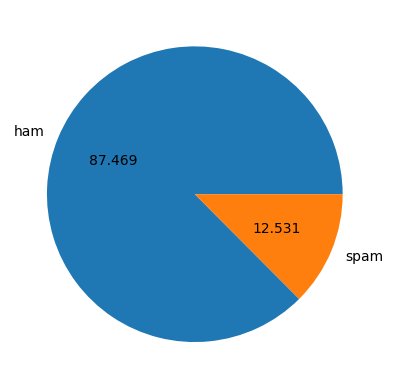

In [12]:
import matplotlib.pyplot as plt
plt.pie(df["v1"].value_counts(), labels=["ham","spam"],autopct="%0.3f")

In [13]:
import nltk
# nltk.download("punkt")

In [14]:
df["num_characters"] = df["v2"].apply(len)
df.sample(3)

,v1,v2,num_characters
468,0,"Yup, no need. I'll jus wait 4 e rain 2 stop.",44
3948,0,HMM yeah if your not too grooved out! And im l...,83
2359,1,Spook up your mob with a Halloween collection ...,149


In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
#break the sentence into indivisual words
df["num_words"] = df["v2"].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(3)

,v1,v2,num_characters,num_words
2973,0,"I'll text carlos and let you know, hang on",42,11
1375,0,We're finally ready fyi,23,5
3868,0,No let me do the math. Your not good at it.,43,13


In [23]:
df["num_sentences"] = df["v2"].apply(lambda x:len(nltk.sent_tokenize(x)))
df.sample(3)

,v1,v2,num_characters,num_words,num_sentences
620,0,Dear we got &lt;#&gt; dollars hi hi,37,13,1
3284,0,They are just making it easy to pay back. I ha...,107,32,3
3927,0,Babe ? I lost you ... Will you try rebooting ?,46,11,2


In [24]:
#getting more information about the newly made 3 columns
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5163.000000,5163.000000,5163.000000
mean,78.811156,18.444122,1.963974
std,58.153491,13.327940,1.448008
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
# get more info about the ham(not_spam)
df[df["v1"] == 0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.428919,17.123782,1.820195
std,56.356310,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# get more info about the spam
df[df["v1"] == 1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,647.000000,647.000000,647.000000
mean,137.318393,27.659969,2.967543
std,30.096861,7.038065,1.490069
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


Visualization

<Axes: xlabel='num_characters', ylabel='Count'>

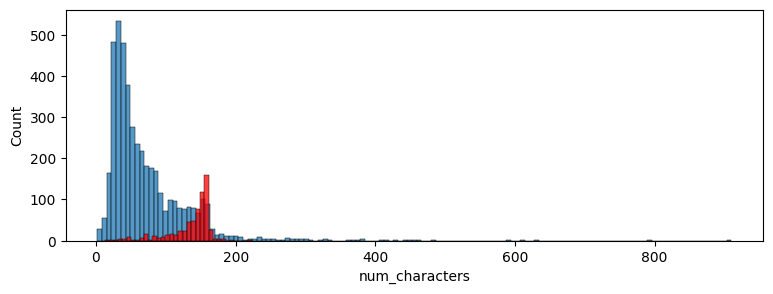

In [27]:
plt.figure(figsize=(9,3))
sns.histplot(df[df["v1"] == 0]["num_characters"])
sns.histplot(df[df["v1"] == 1]["num_characters"],color="red")

<Axes: xlabel='num_words', ylabel='Count'>

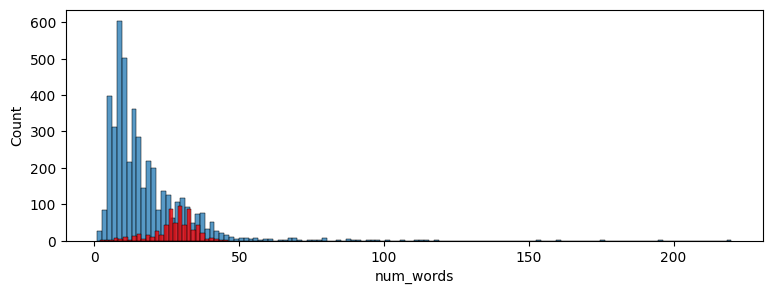

In [28]:
plt.figure(figsize=(9,3))
sns.histplot(df[df["v1"] == 0]["num_words"])
sns.histplot(df[df["v1"] == 1]["num_words"],color="red")

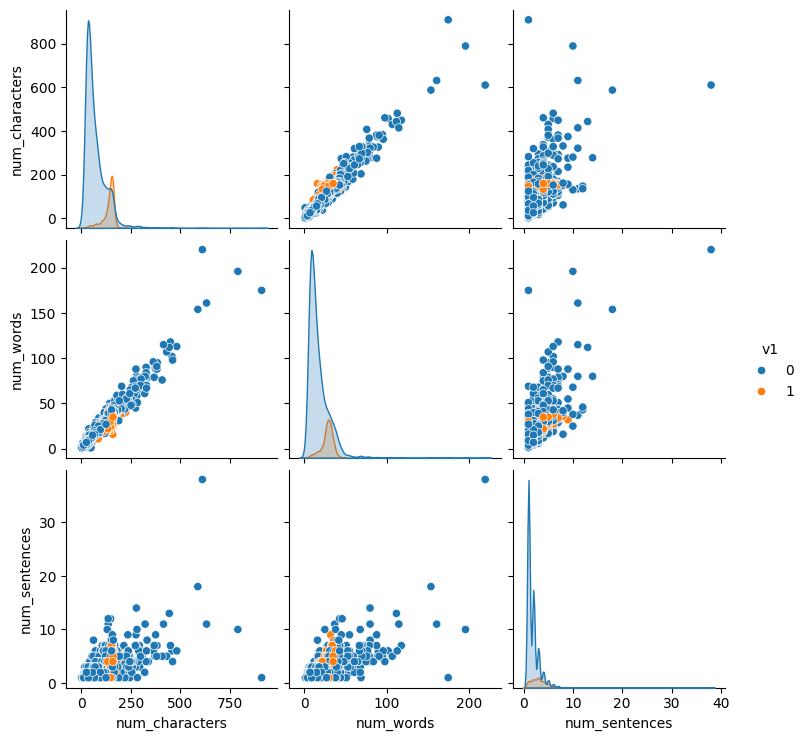

In [29]:
sns.pairplot(df,hue="v1")

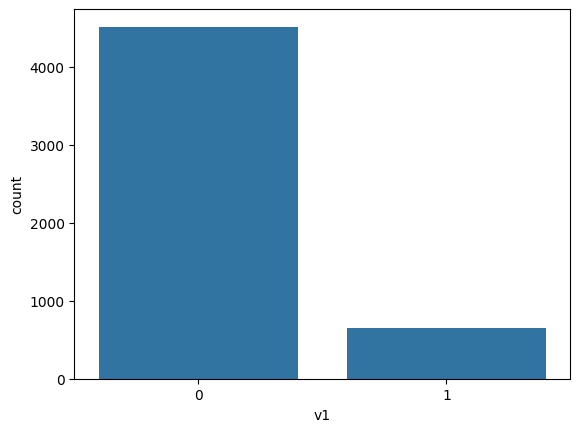

In [30]:
sns.countplot(x='v1', data=df)
plt.show()


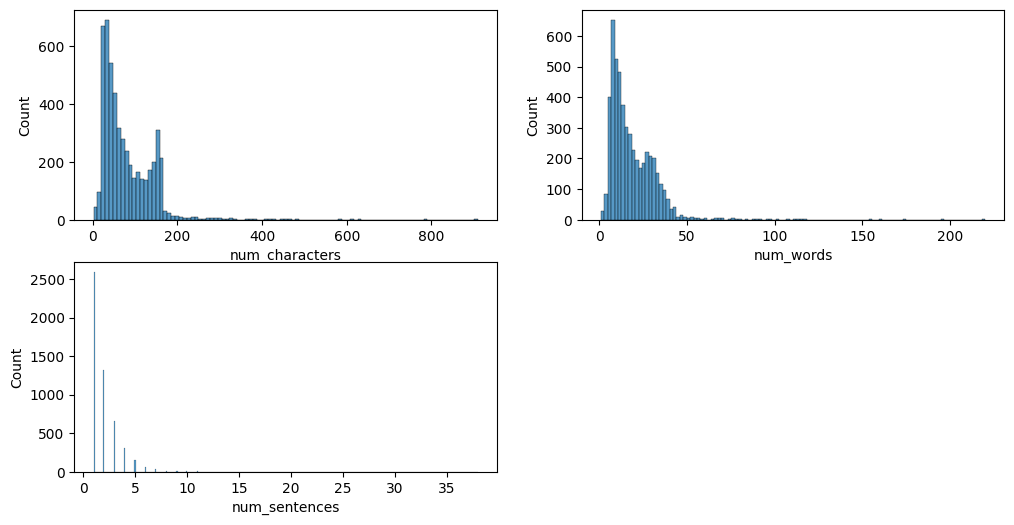

In [31]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['num_characters'])
plt.subplot(2, 2, 2)
sns.histplot(df['num_words'])
plt.subplot(2, 2, 3)
sns.histplot(df['num_sentences'])
plt.show()

Converting email texts into vectors.

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

text = ['Hello my name is james', 'james this is my python notebook', 'james trying to create a big dataset', 'james of words to try differnt', 'features of count vectorizer']

vectorizer = CountVectorizer(stop_words='english')

count_matrix = vectorizer.fit_transform(text)

count_array = count_matrix.toarray()

df1 = pd.DataFrame(data=count_array, columns=vectorizer.get_feature_names_out())

df1


,big,count,create,dataset,differnt,features,hello,james,notebook,python,try,trying,vectorizer,words
0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,1,0,0,0,0
2,1,0,1,1,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [33]:
# Remove the stop words and transform the texts into the vectorized input variables X

X = vectorizer.fit_transform(df["v2"])

y = df["v1"]

# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.3, random_state=0)

In [34]:
clf = GaussianNB()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8902517753389283

In [35]:
# Function to Make Predictions
def predict_spam(input_text):
    text_vectorized = vectorizer.transform([input_text])
    prediction = clf.predict(text_vectorized.toarray())[0]
    return "Spam" if prediction == 1 else "Not Spam"